# Week 7 Project Draft

### Our Use Case about (Company Bankruptcy Prediction)
We are trying to make a model that predicts the bankruptcy of the startups

### 1. Sourcing and Gathering your Data

Download and collect the required files together wherever you're planning to build your model.


### 2. Exploring and Visualizing your Data

* Identify and create the index
* Identify and clean missing Data (if your model requires)
* Identify and create nominal categorical labels (if your data and model requires)
* Identify and modify any ordinal categorical features (eg: figure out how you want to represent "A++" vs "B+" credit ratings")
* Clean and create any fields that may represent non-numerical encodings of relevant data (eg: "36 months" -> 36)
* Dropping data that may duplicate or represent your target dimensions or columns
* Separate your labels from your features
* It may be worthwhile to explore you data and visualize how parts of it relate to each other.



In [1]:
#Importing libaries

import pandas as pd
import numpy as np
import pydot as py
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score ,f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from dtreeviz.trees import dtreeviz
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset we take it from kaggle

df = pd.read_csv('data.csv')
data= df[['Bankrupt?',' Net Income to Total Assets', ' Working Capital/Equity', ' Cash/Current Liability', 
          ' Net worth/Assets', ' Debt ratio %',' Cash/Total Assets', ' Total Asset Turnover',
          ' ROA(B) before interest and depreciation after tax']]

In [20]:
#Reviewing dataset

pd.set_option('display.max_columns',None)
data.head()

,Bankrupt?,Net Income to Total Assets,Working Capital/Equity,Cash/Current Liability,Net worth/Assets,Debt ratio %,Cash/Total Assets,Total Asset Turnover,ROA(B) before interest and depreciation after tax
0,1,0.716845,0.721275,1.473360e-04,0.792424,0.207576,0.004094,0.086957,0.405750
1,1,0.795297,0.731975,1.383910e-03,0.828824,0.171176,0.014948,0.064468,0.516730
2,1,0.774670,0.742729,5.340000e+09,0.792484,0.207516,0.000991,0.014993,0.472295
3,1,0.739555,0.729825,1.010646e-03,0.848535,0.151465,0.018851,0.089955,0.457733
4,1,0.795016,0.732000,6.804636e-04,0.893491,0.106509,0.014161,0.175412,0.522298


In [4]:
#dataset has 6819 rows and 8 columns
data.shape

(6819, 9)

In [5]:
#data.info() the function can be used to give information about the dataset.
#This will provide you with the column names along with the number of non – null values in each column.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bankrupt?                                           6819 non-null   int64  
 1    Net Income to Total Assets                         6819 non-null   float64
 2    Working Capital/Equity                             6819 non-null   float64
 3    Cash/Current Liability                             6819 non-null   float64
 4    Net worth/Assets                                   6819 non-null   float64
 5    Debt ratio %                                       6819 non-null   float64
 6    Cash/Total Assets                                  6819 non-null   float64
 7    Total Asset Turnover                               6819 non-null   float64
 8    ROA(B) before interest and depreciation after tax  6819 non-null   float64
dty

###### We don't found missing Data here .

In [6]:
#finding whether we have null values in the data is by using the isnull() function.
data.isnull().sum()

Bankrupt?                                             0
 Net Income to Total Assets                           0
 Working Capital/Equity                               0
 Cash/Current Liability                               0
 Net worth/Assets                                     0
 Debt ratio %                                         0
 Cash/Total Assets                                    0
 Total Asset Turnover                                 0
 ROA(B) before interest and depreciation after tax    0
dtype: int64

In [7]:
#checking for null values
data.isnull().any()

Bankrupt?                                             False
 Net Income to Total Assets                           False
 Working Capital/Equity                               False
 Cash/Current Liability                               False
 Net worth/Assets                                     False
 Debt ratio %                                         False
 Cash/Total Assets                                    False
 Total Asset Turnover                                 False
 ROA(B) before interest and depreciation after tax    False
dtype: bool

In [8]:
#The function has returned the count of all unique values in the given index.
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

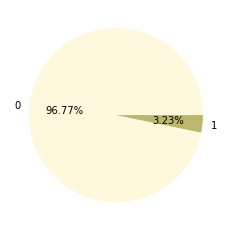

In [9]:
# We take our result from "value_counts()" function then convert it to percentage and draw it  in pie charts
# "Pie()" function to draw pie charts.
# in our result > 0 mean percentage "no Bankrupt" and 1  mean percentage to be Bankrupt

dc=data['Bankrupt?'].value_counts()
mycolors = ["Cornsilk","DarkKhaki"]
plt.pie(dc,autopct= '%4.2f%%',labels=dc.index, colors = mycolors)
plt.show()

In [10]:
#Identify and create nominal categorical labels

pd.get_dummies(['Bankrupt?',' Net Income to Total Assets', ' Working Capital/Equity', ' Cash/Current Liability', 
          ' Net worth/Assets', ' Debt ratio %',' Cash/Total Assets', ' Total Asset Turnover',
           ' ROA(B) before interest and depreciation after tax'])

,Cash/Current Liability,Cash/Total Assets,Debt ratio %,Net Income to Total Assets,Net worth/Assets,ROA(B) before interest and depreciation after tax,Total Asset Turnover,Working Capital/Equity,Bankrupt?
0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

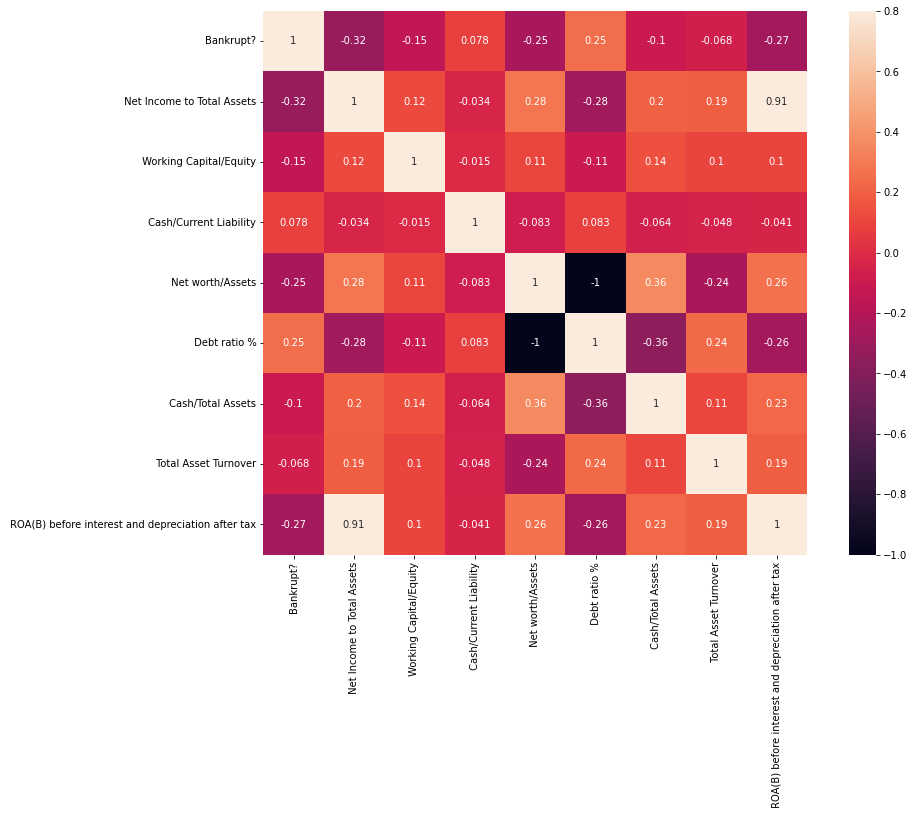

In [11]:
#Find the correlation betweeen the variables 

corr = data.corr() 

fig = plt.figure(figsize=(15,10))

sns.heatmap(corr, vmax=.8, square=True,annot=True)

____________________________________________________________________________________

### 3. Building a Model

After you've selected a model with some assistance from your Teach Team, it's time to instantiate it.

If we're using a model from SciKit Learn, this often means calling the constructor along with any hyper-parameters set to produce an object. We will store this object in a variable and then use it with the SciKit Learn API functions appropirate. Often these will be .fit(...), and .predict(...), sometimes we may also have other methods depending on our choices. 

In [12]:
#Building  Random Forest Classifier
#Defining dependent and independent variables


x = data.drop(columns=["Bankrupt?"])
y = data["Bankrupt?"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
data_train =pd.concat([y_train, x_train], axis=1)


In [13]:
x.describe()

,Net Income to Total Assets,Working Capital/Equity,Cash/Current Liability,Net worth/Assets,Debt ratio %,Cash/Total Assets,Total Asset Turnover,ROA(B) before interest and depreciation after tax
count,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.807760,0.735817,3.715999e+07,0.886823,0.113177,0.124095,0.141606,0.553589
std,0.040332,0.011678,5.103509e+08,0.053920,0.053920,0.139251,0.101145,0.061595
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.796750,0.733612,1.973008e-03,0.851196,0.072891,0.033543,0.076462,0.527277
50%,0.810619,0.736013,4.903886e-03,0.888593,0.111407,0.074887,0.118441,0.552278
75%,0.826455,0.738560,1.280557e-02,0.927109,0.148804,0.161073,0.176912,0.584105
max,1.000000,1.000000,9.650000e+09,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
x.head()

,Net Income to Total Assets,Working Capital/Equity,Cash/Current Liability,Net worth/Assets,Debt ratio %,Cash/Total Assets,Total Asset Turnover,ROA(B) before interest and depreciation after tax
0,0.716845,0.721275,1.473360e-04,0.792424,0.207576,0.004094,0.086957,0.405750
1,0.795297,0.731975,1.383910e-03,0.828824,0.171176,0.014948,0.064468,0.516730
2,0.774670,0.742729,5.340000e+09,0.792484,0.207516,0.000991,0.014993,0.472295
3,0.739555,0.729825,1.010646e-03,0.848535,0.151465,0.018851,0.089955,0.457733
4,0.795016,0.732000,6.804636e-04,0.893491,0.106509,0.014161,0.175412,0.522298


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

# prediction on test set
y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("* Confusion Matrix:")
print()
print(confusion_matrix(y_test,y_pred))

print("___________________________________________________")
print("* Classification:")
print(classification_report(y_test,y_pred))

print("___________________________________________________")

print("* Accuracy =",metrics.accuracy_score(y_test, y_pred))


* Confusion Matrix:

[[1969   18]
 [  48   11]]
___________________________________________________
* Classification:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.38      0.19      0.25        59

    accuracy                           0.97      2046
   macro avg       0.68      0.59      0.62      2046
weighted avg       0.96      0.97      0.96      2046

___________________________________________________
* Accuracy = 0.967741935483871


In [16]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
x, y, = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

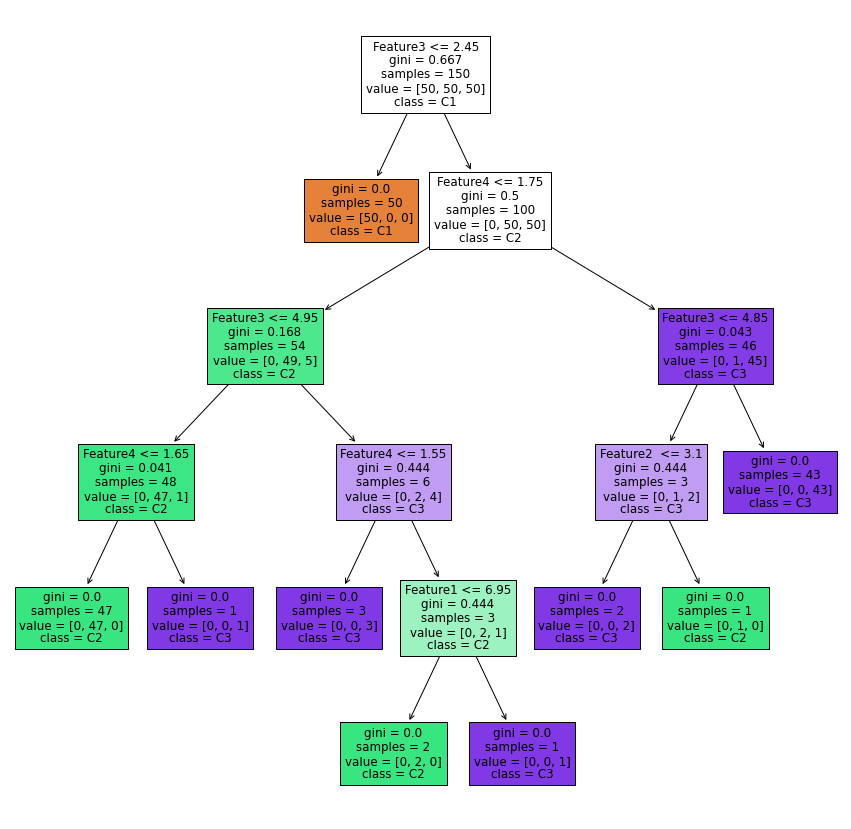

In [17]:
# Plotting
# Number of Instances: 150 (50 in each of three classes)
plt.figure(figsize=(15,15))
F = ["Feature1" ,"Feature2 ", "Feature3", "Feature4","Feature5 ", "Feature6", "Feature7" ,"Feature8"]
S = ["C1", "C2", "C3"]
tree.plot_tree(clf,feature_names = F, class_names = S,filled = True)
plt.show()

_____________________________________________________________________________________________________

### 4. Evaluating Model Performance 

Once we have a model instantiated, we will typically need to split out some training and test data; or we may want to make use of cross validation and other methods from class. Once we have selected training and test data. It's time to see how we did. 

Make use of the appropriate measures for your problem to establish how well your model performed. Did it do well?

If not, consider making some changes to any parts of the above and try again. Often it can take 2-5 attempts to settle on something that works. Remember the 20 minute rule. 

Consider generating some reports and visualizations, a confusion report or a ROC Curve might work great for a classification problem; a line of best fit or a visualization of your predictions and estimates compared to your test data may work great for estimation or forecasting. Get creative and have fun. Be sure to ask your teaching team for help if you need any.

###### Our model perfomed so well because we got "Accuracy = 0.96"

CONCLUSIONS

RandomForest has the best accuracy of=97%

THESE ARE THE VARIABLES RETAINED IN OUR RANDOM FOREST OR THE MOST IMPORTANT FEAUTURES:
  1. Net Income to Total Assets
  2. Working Capital/Equity
  3. Cash/Current Liability
  4. Net worth/Assets
  5. Debt ratio %
  6. Cash/Total Assets
  7. Total Asset Turnover
  8. ROA(A) before interest and % after tax
    
In-conclusion these are the markers or base Feautures that any company must pay more attention to, to insure that they do not end up in Bankruptcy.

_____________________________________________________________________________________________________

### 5. Documenting our Work and Cleaning up our Notebook

Remove any unnecessary cells and tidy up any rough work so it's easy for the grading team to see what you've accomplished. 

Once our notebook has been cleaned up, let's add some Markdown Cells for each section describing our steps and goals. 

Please add one or more MarkDown cells to each section, as well as one at the top of the notebook with the details from your Project Proposal and anything else you'd like to include. This is often a key place in our Notebooks where we provide information to people on our team (co-workers, our boss, etc.).

